# Fandango Movie Ratings Inflation

This work was motivated by an [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) writen by Walt Hickey from FiveThirtyEight in October 2015, in which he presented strong evidence which suggest that Fandango (a popular movie site to buy tickets and check reviews) was displaying biased and dishonest review scores.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, with some movies having up to 1 whole star inflated scores.

In this project, we will analyze more recent movie ratings data from 2016 and 2017 to determine whether Fandango is displaying now the accurate review scores from the users.

### Understanding the data

We will work with two samples of movie ratings from Fandango:

* [fandango_score_comparison.csv](https://github.com/fivethirtyeight/data/tree/master/fandango) : Data collected for Hickey's analysis (2015).

* [movie_ratings_16_17.csv](https://github.com/mircealex/Movie_ratings_2016_17) : Data collected after Hickey's analysis (2016-2017).

First we will explore briefly the two datasets to understand their structure:

In [1]:
#Import pandas
import pandas as pd
pd.options.display.max_columns = 100

#Save csv files in variables
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


From the data set's repository, we can see what criteria they used to choose the samples:

For the previous (2015) date:
* The movie must have had tickets on sale in 2015.
* The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).

For the after (2016-2017) date:
* The movie must have been released in 2016 or later.
* The movie must have had a considerable number of votes and reviews (unclear how many).


The sampling was clearly not random in both cases, because not every movie had the same chance to be included in the sample. Therefore, it is questionable whether this sample is representative of the entire population.

At the same time, we can expect to not have any movie in both data sets since the movie release dates do not overlap.

### Selecting the data of interest

In order to be able to adequarely compare the two samples, we will take the crieria from the `previous` data set in which at least 30 fan ratings on Fandango's website were needed to be included in the sample.

First, let's check first is that criteria was correctly applied in the `previous` data set:

In [4]:
sum(previous['Fandango_votes'] < 30)

0

We confirmed that all the movies in the previous data set have at least 30 reviews.

Now, since in the `after` data set the number of reviews is not specified, we will extract 10 samples from the data set and manually check their review numbers in the present.

However, we discovered that as of August 2021, Fandango no longer uses the 5-Star Fan Ratings described above. Instead, Fandango now uses the Tomatometer and verified Audience Score from Rotten Tomatoes site. 

Therefore, in order to determine if the movies in the `after` data set are indeed popular movies, we will have to use the number of Audience Score we found on Rotten Tomatoes:

In [5]:
#Get 10 samples randomly
after.sample(10, random_state = 1)['movie']

108                     Mechanic: Resurrection
206                                   Warcraft
106                                  Max Steel
107                              Me Before You
51     Fantastic Beasts and Where to Find Them
33                                        Cell
59                                      Genius
152                                      Sully
4                      A Hologram for the King
31                  Captain America: Civil War
Name: movie, dtype: object

|Movie|Audience Score in RT|
|-|-|
|Mechanic: Resurrection|25,000+|
|Warcraft|25,000+|
|Max Steel|5,000+|
|Me Before You|2,500+|
|Fantastic Beasts and Where to Find Them|25,000+|
|Cell|2,500+|
|Genius|2,500+|
|Sully|25,000+|
|A Hologram for the King|10,000+|
|Captain America: Civil War|100,000+|

Since all the moves in our sample seem to be popular movies with more than 2,500+ scores in the present, we will move forward in our study.

Next, in order to stablish a fair comparison between the two data sets, we will isolate movie released in 2015 for the `previous` data set, and only movies released in 2016 for the `after` data set.

For the `previous` data, there is no special column for the releasing year, but we should be able to extract it from the strings in the `FILM` column:

In [6]:
# Make new Year column
previous['year'] = previous['FILM'].str[-5:-1]
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,2015
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2015


Now, let's check how many movies from our sample  do not fit in the release year criteria we specified and isolate only the ones that interest us.

In [7]:
previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [8]:
# Isolate movies released in 2015
previous_2015 = previous[previous['year'] == '2015'].copy()
previous_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [9]:
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [10]:
# Isolate movies released in 2016
after_2016 = after[after['year'] == 2016].copy()
after_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

### Comparing Aggregator Distribution Shapes for 2015 and 2016

Our aim is to figure out if, after Walt Hickey's article in which it was showed the scores in Fandango were much more sweked positively compared to other movie review aggregators, there has been a change in Fandango ratings for popular movies.

In order to do that, we will start comparing the star distributions for the `previous` and `after` data sets using kernel density plots.

The columns we will use for each of the data sets are:
* `Fandango_Stars` and `Fandango`: The number of stars the film had on its Fandango movie page.
* `RT_user_norm_round` and `nr_audience`: The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star.
* `Metacritic_user_norm_round` and `nr_metascore`: The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
* `IMDB_norm_round` and `nr_imbd` : The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star.

In [11]:
# Import necessary libraries and set style
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

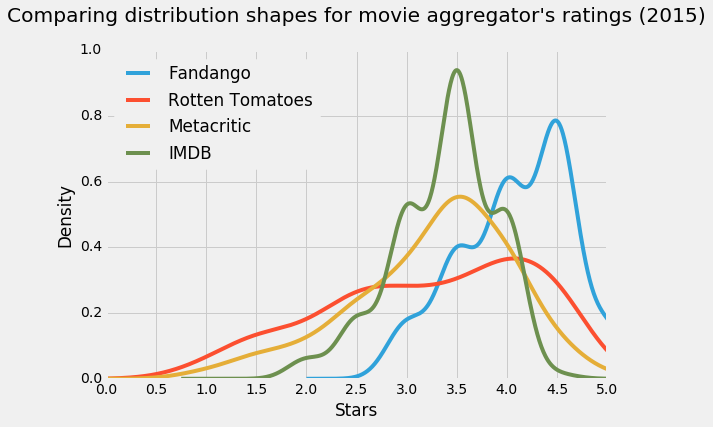

In [12]:
# Make 2015 aggregator comparison graph
previous['Fandango_Stars'].plot.kde(label = 'Fandango', legend = True, figsize = (8,5.5))
previous['RT_user_norm_round'].plot.kde(label = 'Rotten Tomatoes', legend = True)
previous['Metacritic_user_norm_round'].plot.kde(label = 'Metacritic', legend = True)
previous['IMDB_norm_round'].plot.kde(label = 'IMDB', legend = True)

plt.title("Comparing distribution shapes for movie aggregator's ratings (2015)",
          y = 1.07)
plt.xlim([0, 5])
plt.xlabel('Stars')
plt.xticks(arange(0,5.1,.5))
plt.show()

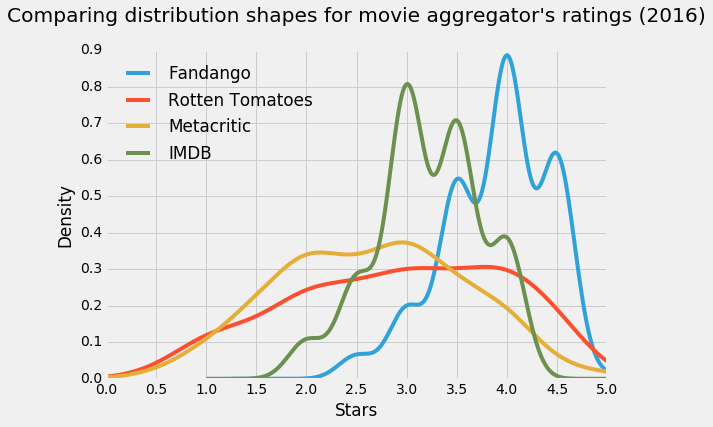

In [28]:
# Make 2016 aggregator comparison graph
after['fandango'].plot.kde(label = 'Fandango', legend = True, figsize = (8,5.5))
after['nr_audience'].plot.kde(label = 'Rotten Tomatoes', legend = True)
after['nr_metascore'].plot.kde(label = 'Metacritic', legend = True)
after['nr_imdb'].plot.kde(label = 'IMDB', legend = True)

plt.title("Comparing distribution shapes for movie aggregator's ratings (2016)",
          y = 1.07)
plt.xlim([0, 5])
plt.xlabel('Stars')
plt.xticks(arange(0,5.1,.5))
plt.legend(framealpha = 0, loc = 'upper left')
plt.show()

By comparing the two figures above we can make a few observations:
* As already mentioned in the original article, Fandango has the strongest left skewed distribution from all the aggregators, and the same pattern remains the same for the popular movies released during 2016.
* All movie aggregator sites show lower rating distributions during 2016, including Fandango. In all cases except for Rotten Tomatoes, the peak of the distribution shifted left 0.5 stars.

Judging by only this comparison, we cannot conclude that Fandango problem which showed inflated reviews for some movies, since it still shows much higher star scores compared to the other sites.

It is also interesting to note the left shift that most aggregators show from 2015 to 2016. This could mean the overall quality of movies was lower during 2016, or that users gave stricter reviews during that year.

Although it does look that nothing changed judging by the comparison with other aggregators, we cannot ignore that Fandango displayed lower scores for 2016, therefore we will take a look at only Fandando data in more detail.

### Comparing Distribution Shapes of Fandango for 2015 and 2016

We will now analyse only the distribution of movie ratings for 2015 and 2016 of only Fandango using a kernel density plot:

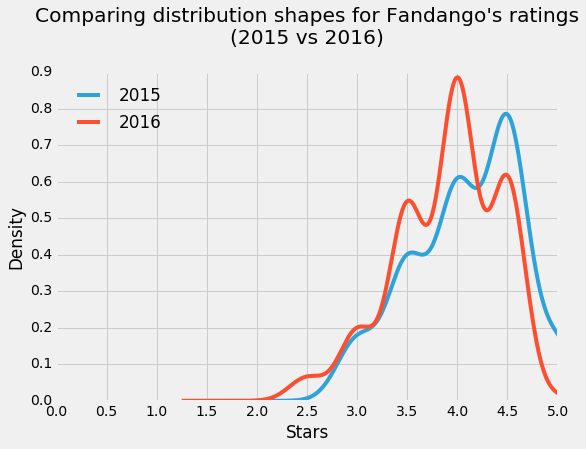

In [27]:
# Make 2015 vs 2016 Fandango comparison graph
previous['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
after['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)", y = 1.07)
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.legend(framealpha = 0, loc = 'upper left')
plt.show()

We will also examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead:

In [19]:
# Normalized frequency table for Fandango 2015
print('2015' + '\n' + '-' * 16)
previous['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [20]:
# Normalized frequency table for Fandango 2016
print('2016' + '\n' + '-' * 16)
after['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     2.803738
3.0     8.411215
3.5    23.364486
4.0    38.317757
4.5    26.635514
5.0     0.467290
Name: fandango, dtype: float64

We can observe that in 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%.

The most frequent rating in 2016 at 38% was 4 stars, almost the same percentage as the most frequent rating in 2015 of 4.5 stars, 37%.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015, although it still looks really high compared to other aggragators and difficult to believe considering it is impossible all the popular movies released in one year were mostly liked by everyone.

To conclude the comparison, we will use a couple of summary metrics to get a more precise picture about the direction of the change in Fandango ratings from 2015 to 2016.

In what follows, we will compute the mean, the median, and the mode for both distributions and then use a bar graph to plot the values.

In [22]:
# Calculate mean for Fandango in 2015 and 2016
mean_2015 = previous['Fandango_Stars'].mean()
mean_2016 = after['fandango'].mean()

# Calculate median for Fandango in 2015 and 2016
median_2015 = previous['Fandango_Stars'].median()
median_2016 = after['fandango'].median()

# Calculate mode for Fandango in 2015 and 2016
mode_2015 = previous['Fandango_Stars'].mode()[0]
mode_2016 = after['fandango'].mode()[0]

# Create a dataframe with all the values
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.089041,3.89486
median,4.000000,4.00000
mode,4.500000,4.00000


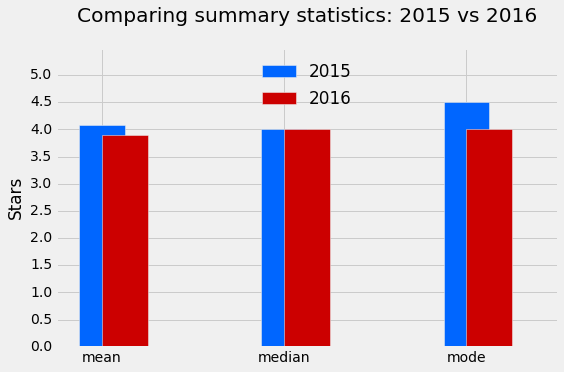

In [25]:
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, .5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with a difference of approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

While the median is the same for both distributions, the mode is lower in 2016 by 0.5, which confirms the direction of the change we saw on the kernel density plot which showed that, on average, popular movies released in 2016 were rated lower than in 2015.

### Conlusion

Our analysis showed that Fandango's ratings of popular movies in 2016 were lower than the ratings for popular movies in 2015. This could mean that the bug in Fandango's system that was inflating movie scores mentioned in Hickey's article the could have been fixed.

However, we cannot be completely sure, since the same pattern of lower movie scores was observed in other movie aggregators like Metacritic and IMDB, which could just mean that the overall quality of movies was worse in 2016 or that users' criteria to score a movie changed.